# Kevin's Pandas' Crib Sheet


## Intro

This is a consolidation notes and examples from:
> Coreys MSchafer's Pandas videos [here](https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS) 

and 
> Hands on Data Analysis by Stefanie Molin
All data in examples and exercises available [here](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition)

Version 2.1W

## 0. Set-Up 

### 0.1 Initial Imports

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import pprint

### 0.2 Main Dataset Constructors

In [3]:
#  Functions that create Example Datasets for use later 

def mk_dictionary(x):
    if x == "people":
        dictionary = {
            'first': ['Corey', 'Jane', 'Janey', 'John', 'Jimmy'], 
            'last': ['Schafer', 'Doe', 'Doe', 'Doe', 'Doe'], 
            'email': ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JaneyDoe@email.com','JohnDoe@email.com', 'JimmyDoe@email.com']
        }
    elif x == 'people2':
        dictionary = {
            'first': ['Tony', 'Steve'], 
            'last': ['Stark', 'Rogers'], 
            'email': ['IronMan@avenge.com', 'Cap@avenge.com']
        }
    # Set-up some dirty data  
    elif x == 'dirty':
        dictionary = {
    'first': ['Corey', 'Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com','CoreyCORRUPTSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '333', '55', '63', '36', None, None, 'Missing']
    }
    elif x == 'weather':
        dictionary = big_dictionary('weather')
    else:
        print(f'!!!!! mk_dictionary called wih invalid parameter !!!!')
        raise SystemExit
    return dictionary 

def mk_dataframe(x):
    df =  pd.DataFrame(mk_dictionary(x))
    return df


# people  = mk_dictionary('people')
# people2 = mk_dictionary('people2')

# df = mk_dataframe('people')
# df2 = mk_dataframe('people2')
# dirty_df = mk_dataframe('dirty')

### 03 Weather Data

In [4]:
# Stuff in here?
def big_dictionary(x):
    if x == 'weather':
        return {
  'datatype': {('2018-10-01 00:00:00'): 'SNWD',
  ('2018-10-02 00:00:00'): 'SNWD',
  ('2018-10-03 00:00:00'): 'SNWD',
  ('2018-10-04 00:00:00'): 'SNWD',
  ('2018-10-05 00:00:00'): 'SNWD',
  ('2018-10-06 00:00:00'): 'SNWD',
  ('2018-10-07 00:00:00'): 'SNWD',
  ('2018-10-08 00:00:00'): 'SNWD',
  ('2018-10-09 00:00:00'): 'SNWD',
  ('2018-10-10 00:00:00'): 'SNWD',
  ('2018-10-11 00:00:00'): 'SNWD',
  ('2018-10-12 00:00:00'): 'SNWD',
  ('2018-10-13 00:00:00'): 'SNWD',
  ('2018-10-14 00:00:00'): 'SNWD'},
 'station': {('2018-10-01 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-02 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-03 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-04 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-05 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-06 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-07 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-08 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-09 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-10 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-11 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-12 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-13 00:00:00'): 'GHCND:USW00094789',
  ('2018-10-14 00:00:00'): 'GHCND:USW00094789'},
 'attributes': {('2018-10-01 00:00:00'): ',,W,2400',
  ('2018-10-02 00:00:00'): ',,W,2400',
  ('2018-10-03 00:00:00'): ',,W,2400',
  ('2018-10-04 00:00:00'): ',,W,2400',
  ('2018-10-05 00:00:00'): ',,W,2400',
  ('2018-10-06 00:00:00'): ',,W,2400',
  ('2018-10-07 00:00:00'): ',,W,2400',
  ('2018-10-08 00:00:00'): ',,W,2400',
  ('2018-10-09 00:00:00'): ',,W,2400',
  ('2018-10-10 00:00:00'): ',,W,2400',
  ('2018-10-11 00:00:00'): ',,W,2400',
  ('2018-10-12 00:00:00'): ',,W,2400',
  ('2018-10-13 00:00:00'): ',,W,2400',
  ('2018-10-14 00:00:00'): ',,W,2400'},
 'value': {('2018-10-01 00:00:00'): 0.0,
  ('2018-10-02 00:00:00'): 0.0,
  ('2018-10-03 00:00:00'): 0.0,
  ('2018-10-04 00:00:00'): 0.0,
  ('2018-10-05 00:00:00'): 0.0,
  ('2018-10-06 00:00:00'): 0.0,
  ('2018-10-07 00:00:00'): 0.0,
  ('2018-10-08 00:00:00'): 0.0,
  ('2018-10-09 00:00:00'): 0.0,
  ('2018-10-10 00:00:00'): 0.0,
  ('2018-10-11 00:00:00'): 0.0,
  ('2018-10-12 00:00:00'): 0.0,
  ('2018-10-13 00:00:00'): 0.0,
  ('2018-10-14 00:00:00'): 0.0}
  }
        
        
df = mk_dataframe('weather')
df

,datatype,station,attributes,value
2018-10-01 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-02 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-03 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-04 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-05 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-06 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-07 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-08 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-09 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0
2018-10-10 00:00:00,SNWD,GHCND:USW00094789,",,W,2400",0.0


### 0.4 DateTime Example 

In [5]:
def mk_datetime_dataframe():
  datetime_df = pd.DataFrame(
    {'Date': {0: ('2020-03-13 20:00:00'),
      1: ('2020-03-13 19:00:00'),
      2: ('2020-03-13 18:00:00'),
      3: ('2020-03-13 17:00:00'),
      4: ('2020-03-13 16:00:00'),
      5: ('2020-03-13 15:00:00')},
    'Symbol': {0: 'ETHUSD',
      1: 'ETHUSD',
      2: 'ETHUSD',
      3: 'ETHUSD',
      4: 'ETHUSD',
      5: 'ETHUSD'},
    'Open': {0: 129.94, 1: 119.51, 2: 124.47, 3: 124.08, 4: 124.85, 5: 128.39},
    'High': {0: 131.82, 1: 132.02, 2: 124.85, 3: 127.42, 4: 129.51, 5: 128.9},
    'Low': {0: 126.87, 1: 117.1, 2: 115.5, 3: 121.63, 4: 120.17, 5: 116.06},
    'Close': {0: 128.71, 1: 129.94, 2: 119.51, 3: 124.47, 4: 124.08, 5: 124.85},
    'Volume': {0: 1940673.93,
      1: 7579741.09,
      2: 4898735.81,
      3: 2753450.92,
      4: 4461424.71,
      5: 7378976.0}}
  )
  datetime_df['Date'] = pd.to_datetime(datetime_df['Date'])
  datetime_df.set_index('Date', inplace=True)       # Setting date column as an index for later functions
  datetime_df.index
  return datetime_df

datetime_df = mk_datetime_dataframe()
# datetime_df

## 1.  Making a Dataframe 

In [6]:
df =  pd.DataFrame(people)                  # Making a dataframe from a dictionary
# df2 = pd.DataFrame(people2)                 # These are used on Corry's examples later
# dirty_df = mk_dataframe('dirty')            # These are used on Corry's examples later
# Load csv in here? bad_df = pd.DataFrame(bad_data)

# Add a whole new dataframe as new rows
pd.concat([df, aggregates_df], axis=1)      # Merges the 2 dataframes alomng the column (#1) axis 

# df

NameError: name 'people' is not defined

## 2. Quick Overview of the Data 

In [ ]:
# df.info()             # Overview of the dataframe
# df.columns            # List column names
# df.head(10)           # List top x rows (default is 5)
# df.tail()             # List bottom x rows (default is 5)
# df.sample()           # List randon x rows (default is 1)
# df.describe()         # Quick summart of the frame, best for wide format


## 3. Indexes


In [ ]:
df = mk_dataframe('people')
# Set a new index. Keep it set with `inplace``.  
# Indexes don't have to be unique
df.set_index('email', inplace=True)     # Set a column to be an index
print(df.index)
print(df)

df.reset_index(inplace=True)            # Reset row indexes to (hand to 'save'a column used a an index)

## 4. Accessing Data 

### 4.1 Access Columns

In [ ]:
df = mk_dataframe('people')
df                                # Simple access
# df['email']                       # Access single column
# df[['last', 'email']]             # Access multiple columns by using a list (a list within the list)i


### 4.2 Access Values

In [ ]:
df = mk_dataframe('people')             #Setup
df.set_index('email', inplace=True)     #Setup
# df.iloc[[0, 1], 2]                    # Access by integer reference / index by using .iloc.  
                                        # .loc and iloc takes row index first

# df.loc[                               # Access by row index name .loc
#     'CoreyMSchafer@gmail.com', 'last']   

# df.loc[                               # As above plus multi selected rows and columns 
#     ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com'], 
#     ['first', 'last']]       

### 4.3 Filtering 

Best to filter with 2 part process:
1. Set filter 
2. Apply filter

_But can't use word "filter" as a variable name it's reserved_

In [ ]:
df = mk_dataframe('people')             #Setup
df.set_index('email', inplace=True)     #Setup

filt = (df['last'] == 'Schafer') |(   # 1) Set filter.  An exampe of an 'or' '|' filter
    df['first'] == 'John') 
df.loc[filt, 'last']                  # 2) Apply filter or
# df.loc[~filt, 'last']                 # 2) Apply inverse of filter

## 5. Cleaning 

### 5.1 Checking for Dirty Data


In [16]:
df = mk_dataframe('dirty')
# Checking for Nulls
# df.info()                 # Will show missing values (nulls) and data types
# dirty_df.isna().sum()     # Identify na values (by getting a mask) rather than drop them with .isna
# # or
# dirty_df.isna()

# Checking for wrong Types
# dirty_df.dtypes           # Identify if data type is correct. 
                            # If numeric are wrong many aggrate functions won't work 

# df.describe()             # This will show some errors up in the dataset, 
                            # eg unreasonably large or small

# df.describe(              # Check the describe for datetime and others
#     include='object')  

# df[df.duplicated(          # Returns the rows (after the first) that
#     ['first', 'last'])]    # are duplicated in the columns mentioned   
                                        

,first,last,email,age
1,Corey,Schafer,CoreyCORRUPTSchafer@gmail.com,333
6,None,NaN,Anonymous@email.com,None


### 5.2 Dropping Dirty Data

In [ ]:
# dirty_df.dropna()                                 # Drop any / all _rows_ that aren't totally complete with .dropna & how = 'any'
                                                    # default values are: dirty_df.dropna(axis='index', how='any')

# dirty_df.dropna(                                  # Drop rows that have missing data in 'any' specified rows with subset=[]
    # axis='index', how='any', 
    # subset=['last', 'email'])

# dirty_df.dropna(axis='columns')                   # Drop incomplete _columns_.  Which is all of them due to row 4

# dirty_df

### 5.3 Replacing Dirty Data  

#### 5.3.1 Replacing Nulls

In [ ]:
# Replacing Nulls
dirty_df.replace('NA', np.nan, inplace=True)          # Replace unusual 'nill' values (in these cases 'NA' & 'Missing') 
dirty_df.replace('Missing', np.nan, inplace=True)     # with the proper np.nan value across whole data frame
# Could do all this at import time for csv pd.read_csv(XXXXX..., na_values=['NA','None'])

dirty_df.fillna(0)                                    # Replaces np.nan  values with an actual value. Most usful for NUMERIC data



#### 5.3.2 Replacing Types

In [ ]:
# Replacing Bad Types
# dirty_df['age'] = df['age'].astype(float)             # Casting a column to the correct data type with .astype
                                                        # Can use .astype on whole dataframe too.
                                                        # Use float not int, as NaN is a float.
# More elegant way to change multiple types:
# !!!!! Needs example updating as data values don't marry up !!!!!
# df = df.assign(
#     date=       lambda x: pd.to_datetime(x['date']),
#     volume =    lambda x: x['volume'].astype(int)
#     )
                                                        
                                                        

## 6. Updating Values

### 6.1 Update Column Names


In [ ]:
df = mk_dataframe('people')             #Setup
# df.set_index('email', inplace=True)     #Setup

# df.columns = ['email', 'first_name', 'last_name']         # Rename all columns 

# df.rename(                                                # Rename specific columns using .rename
# df.set_index('email', inplace=True)     #Setup
#     columns={
#         'first_name': 'first', 'last_name': 'last'
#         }, inplace=True                                   # Note, need "inplace" 
#     ) 
 
# df.columns = [x.upper() for x in df.columns]              # Rename all columns by an inline comprehension .columns

# Reset
df.columns = [x.lower() for x in df.columns]                # Reset so later examples work
df

### 6.2 Update Values - Direct Updates

In [ ]:
df['email'] = df['email'].str.lower()                               # Update whole column with string object method with.str.x
df.loc[3] = ['John2Smith@email.com', 'John2', 'Smith']              # Update whole row with .loc
df.loc[2, ['last', 'email']] = ['Smith', 'janeysmith@email.com']    # Update specific columns of a row with .loc

# Update based on filter 
filt = (df['email'] == 'John2Smith@email.com')                      # Update cells based on a filter with .loc
# df[filt]['last'] = 'Smith'                                        # DON'T do this, it won't work
df.loc[filt, 'first'] = 'Johnny'                                    # THIS will, need .loc

df

### 6.3 Updating Values - with Functions 

Four Functions:
- `apply`
- `applymap` 
- `map`
- `replace`

#### 6.3.1 `apply` a function to an object (dataframe or series) and get a series as a result
- Object can be a series (by default a column) 
- Object can be a dataframe in which case it's applied to each series (column) for a single result for each


In [ ]:
# Applying to a column
# df['email'].apply(len)            # `apply` the `len` function to the email column

# def update_email(email):          # 'apply' your own function
#     return email.upper()
# df['email'].apply(update_email) 

# df['email'].apply(                # 'Apply' a your own inline (LAMBDA) function 
#     lambda x: x.lower()           # to a whole column and get a series as a result
#     )  

# When applied to a dataframe 'apply' is applied across each series
df.apply(len) # or df.apply(len, axis='columns') or df.apply(len, axis='rows')   
# df.apply(pd.Series.min)           # Returns the minimum (first in alaphs) in each column

# df.apply(                           # Applying a Lambda function to each series
#     lambda x: x.min()
#     )     


#### 6.3.2 `applymap` a function to a dataframe and get a dataframe as a result.  
Applied elementwise


In [ ]:
# df.applymap(len)
df.applymap(str.lower)

#### 6.3.3 `map` a series and get a series as a result.  
Replaces __all__ elements in series  

In [ ]:
# .map only works on a series. Use like a vlookup
# Use it to subsitute one value for another via a lookup dictionary.
# Unsubtituted vales replaced by NaN
df['first'].map({'Corey': 'Chris', 'Jane': 'Mary'})

#### 6.3.4 `replace` on an object (series or dataframe) a get same object as a result

In [ ]:
# .replace works like map but leaves unsubsittuted values untouched (not NaN)
df['first'] = df['first'].replace({'Corey': 'Corey2', 'Jane': 'Jane2'})
df

## 7. Updating Shape

### 7.1 Columns

#### 7.1.1 Adding Columns

In [ ]:
df = mk_dataframe('people')
# Can't use . notation as pandas would look for method

# Split data with str.split.  Splits on space by default so not needed
# would give list by default, need expand=True to make 2 new columns in dataframe
# df['full_name'].str.split(' ', expand=True)

# Creating a new column with strings, can use numeric as well with .apply 
df['full_name'] = df['first'] + ' ' + df['last']

# Create multiple columns at once 
# df[['first', 'last']] = df['full_name'].str.split(' ', expand=True)

# Add new columns
df['numeric_data_01'] = \
    np.random.randint(0,100, size=len(df))           # These one is needed for the aggregate examples later
df['numeric_data_02'] = \
    np.random.randint(0,100, size=len(df))
df


In [ ]:
df = mk_dataframe('people')
df                                # Simple access
# df['email']                       # Access single column
# df[['last', 'email']]             # Access multiple columns by using a list (a list within the list)i


In [ ]:
df = mk_dataframe('people')             #Setup
df.set_index('email', inplace=True)     #Setup
# df.iloc[[0, 1], 2]                    # Access by integer reference / index by using .iloc.  
                                        # .loc and iloc takes row index first

# df.loc[                               # Access by row index name .loc
#     'CoreyMSchafer@gmail.com', 'last']   

# df.loc[                               # As above plus multi selected rows and columns 
#     ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com'], 
#     ['first', 'last']]       

#### 7.1.2 Dropping Columns

In [ ]:
# Remove columns with .drop like a db
df.drop(columns=['first', 'last'], inplace=True)
df

### 7.2 Rows

#### 7.2.1 Adding Rows

In [ ]:
df = mk_dataframe('people')
# Adding a single row with .append (Now deprecated)
# df.append({'first': 'Tony'}, ignore_index=True) # insert new row even if no index given: ignore_index=True

# So use:
# df2 = pd.DataFrame({'first': ['Tony']})
# pd.concat([df, df2])


# Add a whole new dataframe as new rows
# Set-Up New dataframe
# aggregates_df = pd.DataFrame()
# aggregates_df['numeric_data_01'] = \
#     np.random.randint(0,100, size=len(df))  
# aggregates_df['numeric_data_02'] = \
#     np.random.randint(0,100, size=len(df))
# pd.concat([df, aggregates_df], axis=1)      # Merges the 2 dataframes alomng the column (#1) axis 

#### 7.2.2 Dropping Rows


In [ ]:
# df.drop(index=3, inplace=True)                # Deleteing a row with .drop

filt = df['full_name'] == 'Jane2 Doe'         # Dropping rows based on values.  This case index
# df.drop(index=df[filt].index, inplace=True)


In [ ]:
# Deleting rows based on values 
# filt = df['last'] == 'Stark'
# df.drop(index=df[filt].index)
# df.drop(index=df[filt].index, inplace=True)

### 7.3 Dataframes

#### 7.3.1 Concatanating

In [29]:
df = df1 = mk_dataframe('people')
# Adding a whole new dataframe as new rows

pd.concat([df, df1],         ignore_index=True, sort=False) # Adds as rows 
pd.concat([df, df1], axis=1, ignore_index=True, sort=False) # Adds as columns

,0,1,2,3,4,5
0,Corey,Schafer,CoreyMSchafer@gmail.com,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@email.com,Jane,Doe,JaneDoe@email.com
2,Janey,Doe,JaneyDoe@email.com,Janey,Doe,JaneyDoe@email.com
3,John,Doe,JohnDoe@email.com,John,Doe,JohnDoe@email.com
4,Jimmy,Doe,JimmyDoe@email.com,Jimmy,Doe,JimmyDoe@email.com


#### 7.3.2 Merging (on any Column)

In [ ]:
# Merging Dataframes
# By default, `merge()` performs an inner join. We simply specify the columns to use for the join. The left dataframe is the one we call `merge()` on, and the right one is passed in as an argument:

# inner_join = weather.merge(station_info, left_on='station', right_on='id')
# left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')
# right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')

# valid_station.merge(
#     station_with_wesf, how='left', left_index=True, right_index=True, suffixes=('', '_?')
# ).query('WESF > 0').head()

#### 7.3.3 Joining (on Index only)

In [ ]:
# Merge will do everything that .join can do. 
# but .join is a bit easier to use but only works on indexes

# valid_station.join(station_with_wesf, how='left', rsuffix='_?').query('WESF > 0').head() Joins can be very resource-intensive, so it's a good idea to figure out what type of join you need using set operations before trying the join itself. 
# weather.index.intersection(station_info.index)
# weather.index.difference(station_info.index)
# station_info.index.difference(weather.index)
# weather.index.unique().union(station_info.index)


## 8. Sorting

### 8.1 Sort a Series 

In [ ]:
df['email'].sort_values()    # Sort a series (column) with .sort_values 

### 8.2 Sort a Dataframe

In [ ]:
# df.sort_values(by='email', ascending=False)   # Sort a dataframe by a single column with sort_values

df.sort_values(                                 # Sort a dataframe by a multiple columnsin a list with .sort_values
    by=['email', 'full_name'], 
    ascending=False)  

# df.sort_values(                               # Sort a dataframe by a multiple columns in a list with .sort_values 
#     by=['email', 'full_name'],                # and different asending attrbutes from a list and make perm with inpace 
#     ascending=[False, True], 
#     inplace=True  
#     )

df.sort_index()                               # Reset the order based on the "original" index with .sort_index

## 9. Aggregates

In [ ]:
# aggregates_df[[                                     # Use aggregation functuins, such as:
#     'numeric_data_01', 'numeric_data_02']].median() # mean, mode, standard deviation on a simgle column

# aggregates_df['numeric_data_01'].count()            # count the number of populated fields in a column with .count

# aggregates_df['numeric_data_01'].value_counts()     # count the number of eachvalue with .value_counts 

# aggregates_df['numeric_data_01'].value_counts(        # or to get a percentage use the normalise=True attribute
#     normalize=True)*100

## 10. Groups


### 10.0 Reset Dataframes

In [ ]:
df = mk_dataframe('people')
df = pd.merge(df, aggregates_df, left_index=True, right_index=True)
# df = pd.concat([df, aggregates_df], axis = 1)
df

### 10.1 Working with Groups

In [ ]:
# Create a group in a similar way as we created a filter, but with .groupby([column_name])
# This gives you a group object, indexed by the group rather than true / galse list of a filter
grp_last = df.groupby(['last'])
grp_last.groups                # KT added to see groups and indexes

# Then apply methods to the group in a 2nd step, e.g., .get_group 
grp_last.get_group('Doe')

# Apply a function (.value_counts) to a column after already being grouped
# Can filter furtther with .loc makes it loke usiong a filter
# Can also get percentage like above with (normalize=True)*100
grp_last['first'].value_counts() #.loc['Smith']

# Can retrive multiple columns and perform other aggregate functions with their methods 
grp_last[['numeric_data_01', 'numeric_data_02']].median() #.loc[['Smith' , 'Doe']]

# *** Or use more generic form to apply multiple aggregated functions with .agg ***
# Seems most generic to me!!!
grp_last[['numeric_data_01', 'numeric_data_02']].agg(['count', 'mean', 'std']) #.loc[['Smith' , 'Doe']]

# Counting rows with filter.  Counts true's in the returned series with .sum
filt = df['last'] == 'Doe'
df.loc[filt]['first'].str.contains('Jane').sum()

# But for a group need to .apply the function to all the group's series 
grp_last['first'].apply(lambda x: x.str.contains('n').sum())

### 10.2 Calculating Percentages

In [ ]:
# How to find the percentage with an n in their first name and group by surname

# Create a series of the number of people with each surname
surname_count = df['last'].value_counts()
surname_count

# Create a series of people with each surname, with 'n' in first name
surname_count_with_n = grp_last['first'].apply(lambda x: x.str.contains('n').sum())
surname_count_with_n

# Merge the 2 series togther, add and calculate the percentage (answer column) and tidy up column names
df_with_n = pd.concat([surname_count, surname_count_with_n], axis='columns', sort=False)
df_with_n['percentage'] = df_with_n['first']/df_with_n['last']*100
df_with_n.rename(columns={'first': 'First_with_an_n', 'last': 'Surname'}, inplace=True)
df_with_n.sort_values('percentage', ascending=False)
# df_with_n.loc['Smith']

## 11. Datetime 

### 11.1 Making a Column Datetime


In [ ]:
# datetime_df['Date'] = pd.to_datetime(datetime_df['Date'])
# datetime_df.set_index(['Date'], inplace=True)
# datetime_df.dtypes
# datetime_df

datetime_df

In [ ]:
datetime_df['Date'] = \
    pd.to_datetime(datetime_df['Date'])     # Apply the pandas to_datetime function to a column             

# datetime_df['Date'] = \
#     datetime_df['Date'].apply(pd.to_datetime)# Same as above

# Can do at import time if prefered
datetime_df

### 11.2 Using Datetime Values

In [ ]:
# datetime_df.loc[0, 'Date'].day_name()   # To find the day name of a single datetime

# datetime_df['DayOfWeek'] =\
#     datetime_df['Date'].dt.day_name()   # New column comtaining day name with .dt.day_name()

# Some self explanatory date functions
# print(datetime_df['Date'].min())
# print(datetime_df['Date'].max())
# print(datetime_df['Date'].max() - datetime_df['Date'].min()) # Known as time delta

# Filtering on date range in str converted to a datetime with .to_datetime
filt = (
    datetime_df['Date'] >= pd.to_datetime('2020-03-13 16:00:00')) & (
    datetime_df['Date'] < pd.to_datetime('2020-03-13 18:00:00'))

datetime_df.loc[filt]
# datetime_df


### 11.3 Using Datetime as an Index

In [ ]:
datetime_df.set_index('Date', inplace=True)       # Setting date column as an index for later functions
datetime_df.index

datetime_df.loc['2020-03-13 16:00']               # Single value slice on index with .loc

# datetime_df.loc[                                  # Slice on index with .loc and for range :
#     '2020-03-13 17:00':'2020-03-13 19:00']                    

# datetime_df.loc[
#     '2020-03-13 17:00':'2020-03-13 19:00'][        # Get an aggregate value of a column sliced by date 
#     'Close'].mean()    

# datetime_df['High'].resample('D').max()         # Resample (downsample) a range using 'D' for day and .resample
# datetime_df

### 11.4 Resampling 

In [ ]:
# Resample whole dataframe with single aggregation method
df.resample('W').mean()

In [ ]:
# Resample whole dataframe with diferent aggregations with a map & .agg method
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

## 12. Plots

<AxesSubplot:xlabel='Date'>

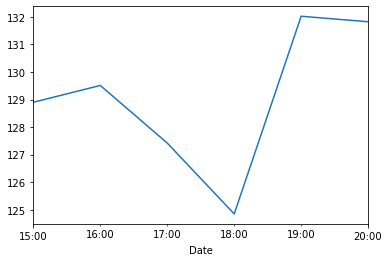

In [24]:
datetime_df = mk_datetime_dataframe()

# Setup Series to Plot
highs = datetime_df['High'].resample('H').max()
highs

# # Quick line plot with mathplot & a Magic command needed for Jupyter notebook
%matplotlib inline 
highs.plot()

# datetime_df.index

## X. Common Problems  

### X.1 "SettingWithCopyWarning" 

In [ ]:
# "SettingWithCopyWarning" fixed with .copy() 
# to explicitly decare that new opbject is a copy not a reference

## XX.  To File

### From Chap 3 Section 5
Cleaning, handling duplicate, missing or invalid data

In [ ]:
pd.DataFrame({      # Really nice way to gather summary stats for targeted rows into a data frame
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T                # Note the .T to transpose the results


In [ ]:
# Qurying Data
snow_data = weather.query('datatype == "SNOW" and value > 0 and station.str.contains("US1NY")')
snow_data.head()

valid_station = dirty_data.query('station != "?"').drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query('station == "?"').drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])



In [ ]:
## Arithmetic and statistics
# We already saw that we can use mathematical operators like `+` and `/` with dataframes directly. However, we can also use methods, which allow us to specify the axis to perform the calculation over. By default, this is per column. Let's find the Z-scores for the volume traded and look at the days where this was more than 3 standard deviations from the mean:

# .sub
# .mean()
# .div
# .std()
# .abs()
# .rank()
# .pct_change()
# .any()
# .all()


## Bins
# pd.cut() to create bins of even range in volume
# pd.qcut() to create bins of even content counts

# volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
# volume_binned.value_counts()

# volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
# volume_binned.value_counts()



# ## Applying Functions
# We can use the `apply()` method to run the same operation 
# oct_weather_z_scores = central_park_weather\
#     .loc['2018-10', ['TMIN', 'TMAX', 'PRCP']]\
#     .apply(lambda x: x.sub(x.mean()).div(x.std()))
# oct_weather_z_scores.describe().T



In [ ]:
# Need somthing on np.vectorize() to vectorize functions similar to how `map()` works

In [ ]:
# Windows 
# .rolling method with .assign for new columns 
# central_park_weather.loc['2018-10'].assign(
#     rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
##     and other in here too 
# )[['PRCP', 'rolling_PRCP']].head(7).T

# Whole dataframe at once or 'apply' to whole dataframe at onces
# central_park_weather.loc['2018-10'].rolling('3D').mean().iloc[:7,:6]

# Use .agg for different agg methgods
# central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
#     {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
# ).join( # join with original data for comparison
#     central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], 
#     lsuffix='_rolling'
# ).sort_index(axis=1) # sort columns so rolling calcs are next to originals

# ewm() method for exponentially weighted moving calculations

In [ ]:
# .expanding gives and expaning window rather then a rolling one
# equivalent to cumulative aggregations like `cumsum()` however
# - we aren't limited to predefined aggregations. 
# - can specify the minimum number of periods required to start calculating
    
# central_park_weather.loc['2018-06'].assign(
#     TOTAL_PRCP=lambda x: x.PRCP.cumsum(),
#     AVG_PRCP=lambda x: x.PRCP.expanding().mean()
# ).head(10)[['PRCP', 'TOTAL_PRCP', 'AVG_PRCP']].T 

# central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
#     {'TMAX': np.max, 'TMIN': np.min, 'AWND': np.mean, 'PRCP': np.sum}
# ).join(
#     central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], 
#     lsuffix='_expanding'
# ).sort_index(axis=1)



In [ ]:
# Pipes = 'put result into fillowing function'
# We can use pipes to apply any function that accepts our data as the first argument and pass in any additional arguments. This makes it easy to chain steps together regardless of whether they are methods or functions:

# f(g(h(data), 20), x=True)
# = same as =
# data.pipe(h)\
#     .pipe(g, 20)\
#     .pipe(f, x=True)\




Use merge, which is an inner join by default:

pd.merge(df1, df2, left_index=True, right_index=True)
Or join, which is a left join by default:

df1.join(df2)
Or concat), which is an outer join by default:

pd.concat([df1, df2], axis=1)